In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy

In [4]:
add_spaces=0 #va a contar los guiones que aparecen en el genoma de referencia, al hacer el alineado
temp=0

#Lee el archivo FASTA y manda los nombres y secuencias a un diccionario
with open('8_de_cada_una.fasta') as f:
  sequences = {} #inicializa el diccionario
  name = None
  for line in f:
    line = line.strip()
    if line.startswith('>'):  
      name = line[1:]
      sequences[name] = ''
    else:
      sequences[name] += line
      if temp == 0:
        #Encuentra la cantidad de espacios iniciales "-" para saber cuántas posiciones están alineadas antes de que empiece la secuencia real.
        while line[add_spaces]=='-': add_spaces+=1
        temp = 1

print(add_spaces)

25


In [5]:
#Imprime los nombres de las secuencias encontradas.
print("Secuencias:")
for name in sequences.values():
  print(name)

Secuencias:
-------------------------AACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTTTTGCAGCCGATCATCAGCACATCTAGGTTTTGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTAC

In [6]:
#Imprime los nombres de las secuencias encontradas.
print("Secuencias:")
i = 0
for name in sequences.keys():
  print(str(i)+' '+name)
  i=i+1
#POR QUÉ NO DETECTA LA OTRA DE BOTSWANA?

Secuencias:
0 hCoV-19/India/TN-ICMR-INSACOG-SPHL1343/2021|EPI_ISL_15003313|2021-11-19
1 hCoV-19/India/GA-NCCS-601716226/2021|EPI_ISL_15157215|2021-12-13
2 hCoV-19/India/GA-NCCS-586999988/2021|EPI_ISL_15157245|2021-11-29
3 hCoV-19/India/AS-NEIST-INSACOG-R7-CIDIN0455/2021|EPI_ISL_14978714|2021-08-25
4 hCoV-19/India/AS-NEIST-INSACOG-R5-CIDIN0323/2021|EPI_ISL_14953142|2021-07-21
5 hCoV-19/India/OR-ILSGS17529/2022|EPI_ISL_14749025|2022-02-02
6 hCoV-19/India/TN-INSACOG-CBR-S-7828/2021|EPI_ISL_14678444|2021-10-27
7 hCoV-19/India/GA-NCCS-3055200213398/2021|EPI_ISL_15162750|2021-12-04
8 hCoV-19/Botswana/R209B69_BHP_AAC31884/2021|EPI_ISL_18210988|2021-12-06
9 hCoV-19/Botswana/R209B60_BHP_AAC45786/2021|EPI_ISL_18210983|2021-12-21
10 hCoV-19/Botswana/R209B55_BHP_859936/2021|EPI_ISL_18210979|2021-12-04
11 hCoV-19/France/HDF-HMN-22052230219/2022|EPI_ISL_13371056|2022-03-07
12 hCoV-19/France/BFC-LBZCentre-JA2204040093/2022|EPI_ISL_13524814|2022-04-04
13 hCoV-19/France/un-IHU-063862/2022|EPI_ISL_17750

In [20]:
num_seqs = len(sequences)
dist_matrix = np.zeros((num_seqs, num_seqs))
for i in range(num_seqs):
  for j in range(i+1, num_seqs):
    # Usamos list(sequences.items()) para convertir el diccionario a una lista de tuplas (nombre, secuencia)
    name1, seq1 = list(sequences.items())[i]
    name2, seq2 = list(sequences.items())[j]
    diff_count = 0
    for k in range(0,len(seq1)):
      # Para cada par de secuencias, cuenta el número de diferencias (mutaciones) entre ellas en los rangos especificados.
      if seq1[k] != seq2[k] and seq1[k]!= 'N' and seq2[k]!= 'N':
      #if seq1[k] != seq2[k] and seq1[k]!= 'N' and seq2[k]!= 'N':
          diff_count += 1
      
      #Guarda las distancias en la matriz de distancia simétrica
      dist_matrix[i,j] = diff_count
      dist_matrix[j,i] = diff_count

print(dist_matrix)

[[  0.  76.  74.  68.  50. 125. 118.  93. 252. 183. 304.  75. 101. 167.
  162.  92. 129.  92.]
 [ 76.   0.  45.  65.  88. 173. 110.  67. 285. 216. 336.  85. 139. 195.
  190. 118. 159. 118.]
 [ 74.  45.   0.  77. 105. 154.  97.  76. 292. 225. 344. 104. 141. 212.
  201. 139. 178. 139.]
 [ 68.  65.  77.   0.  71. 166. 120.  95. 267. 198. 319.  80. 143. 190.
  184. 116. 152. 116.]
 [ 50.  88. 105.  71.   0. 145. 140. 116. 219. 150. 271.  76. 121. 129.
  124.  63. 124.  63.]
 [125. 173. 154. 166. 145.   0. 174. 191. 258. 189. 310. 173. 115. 194.
  187. 169. 120. 169.]
 [118. 110.  97. 120. 140. 174.   0.  53. 353. 284. 405. 148. 187. 258.
  251. 184. 221. 184.]
 [ 93.  67.  76.  95. 116. 191.  53.   0. 327. 258. 379. 122. 167. 232.
  226. 157. 196. 157.]
 [252. 285. 292. 267. 219. 258. 353. 327.   0.  69.  52. 228. 199. 121.
  117. 197. 115. 197.]
 [183. 216. 225. 198. 150. 189. 284. 258.  69.   0. 121. 159. 130. 144.
  140. 128.  93. 128.]
 [304. 336. 344. 319. 271. 310. 405. 379.  52. 121

In [21]:
pd.DataFrame(dist_matrix).shape

(18, 18)

<AxesSubplot:>

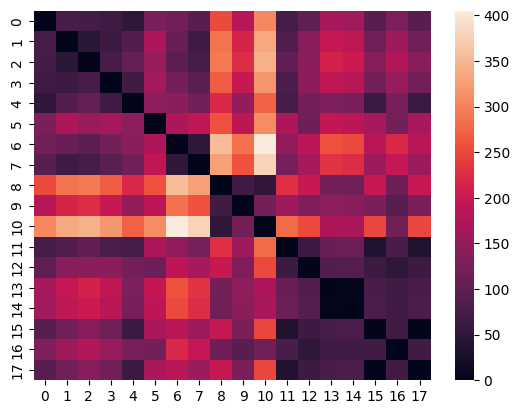

In [22]:
import seaborn as sns
sns.heatmap(dist_matrix,annot=False)

In [23]:
import argparse
import numpy as np
import gudhi
import matplotlib.pyplot as plot

In [24]:
max_edge_length = 360
max_dimension = 3
band = 0.0

print("#####################################################################")
print("RipsComplex creation from defined distance matrix G3")
   
rips_complex = gudhi.RipsComplex(
   distance_matrix=dist_matrix, max_edge_length=max_edge_length  
)

#####################################################################
RipsComplex creation from defined distance matrix G3


In [25]:
simplex_tree = rips_complex.create_simplex_tree(max_dimension=max_dimension)
   
message = "Number of simplices=" + repr(simplex_tree.num_simplices()) 
print(message)
  
diag = simplex_tree.persistence()

print("betti_numbers()=")
print(simplex_tree.betti_numbers())

Number of simplices=3789
betti_numbers()=
[1, 0, 0]


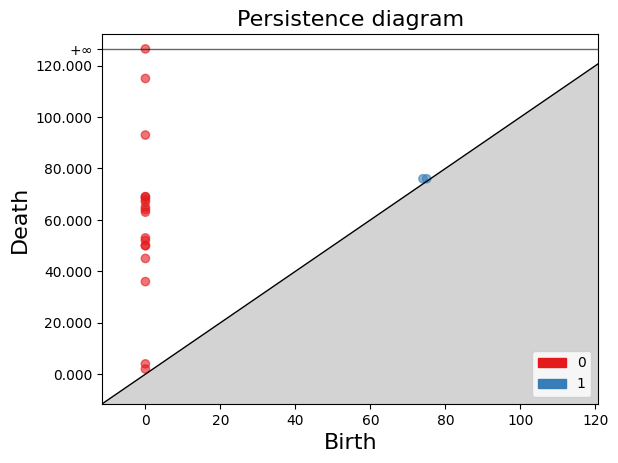

In [26]:
gudhi.plot_persistence_diagram(diag, band=band)
plot.show()

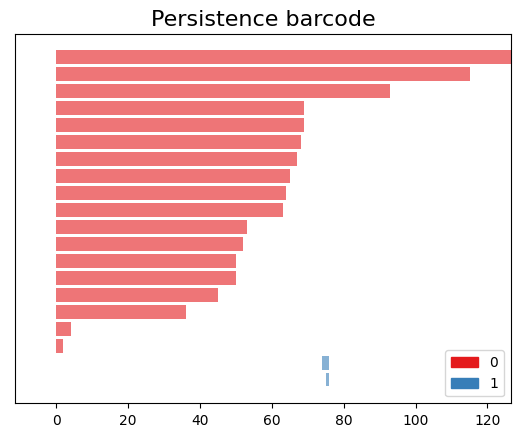

In [16]:
gudhi.plot_persistence_barcode(diag)
plot.show()